Question 1

## Using Matching pursuit algorithm

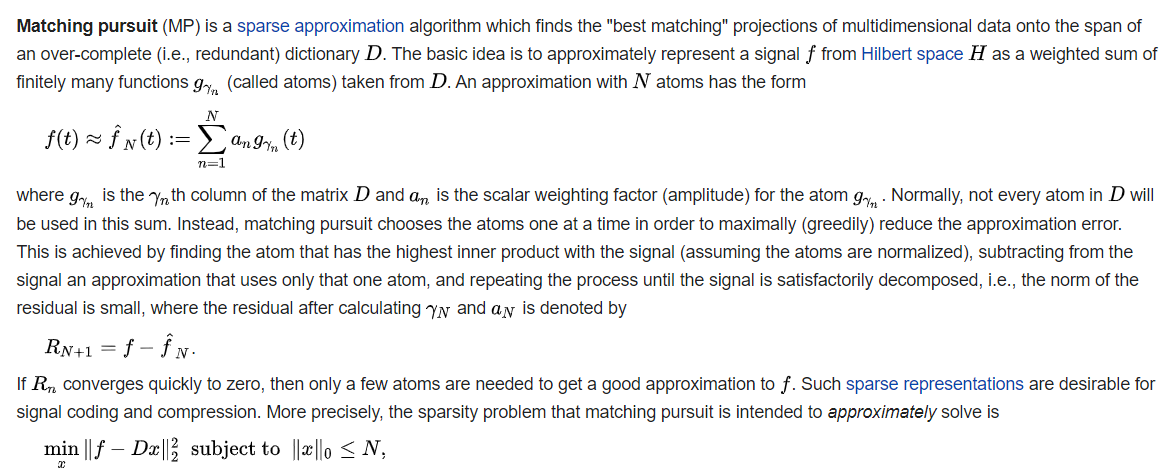

where image.png is the L0 pseudo-norm (i.e. the number of nonzero elements of x). In the previous notation, the nonzero entries of x are 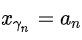. Solving the sparsity problem exactly is NP-hard, which is why approximation methods like MP are used.
(Sources used: Wikipedia)

In [19]:
#Install this if haven't done already
# !pip install numpy

In [20]:
import numpy as np

Getting the values of y and A from the question

In [21]:
y = np.array([[1.65],
     [-0.25]])
A = np.array([[-0.707,0.8,0],
     [0.707,0.6,-1]])

The algorithm:


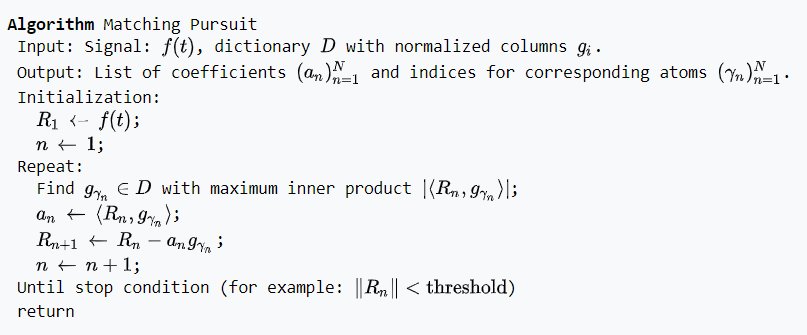

### Defining the function.
<br>This takes A and y as **input** and gives the **output**<br>
consisting of 3 lists: list of a, list of corresponding indices, and list of the tupleof these two

Before that, checking the norm range to adjust the threshold value

In [22]:
R = y
norm_R = np.squeeze(np.linalg.norm(R))
norm_R
threshold_val = 0.00000001

In [23]:
#Using Matching pursuit
def find_x_mp(A, y):
  #A has shape (m,N)
  #x has shape (N,1)
  #y has shape (m,1)
  N = A.shape[1]
  m = A.shape[0]
  #gi where i = 1 to N are the columns in A.T
  #Normalizing the columns
  # A_normed = (A -A.min(0)) / A.ptp(0)
  #initialization
  R = y 
  count = 1
  norm_R = np.squeeze(np.linalg.norm(R)) 
  threshold = threshold_val
  i_list = []
  a_list =[]
  ai_list=[]
  while(norm_R>threshold and count<20):
    for i in range(m):
      gi = A[:,i].reshape(m,1)
      if(i==0):
        max = abs(np.dot(A[:,0].T, R))
        i_max =0
      inner_product = np.squeeze(abs(np.dot(gi.T, R)))
      print(inner_product)
      if(inner_product>max):
        max = inner_product
        i_max = i
    
    gn = A[:,i_max].reshape(m,1)
    an = np.dot(gn.T, R)
    R= R - an*gn
    norm_R = np.squeeze(np.linalg.norm(R))
    count=count+1
    a_list.append(an)
    i_list.append(i_max)
    ai_list.append((an,i_max))

  return a_list, i_list, ai_list

Calling the function

In [24]:
a_list, i_list, ai_list = find_x_mp(A, y)

1.3433
1.1700000000000002
0.000405676600000136
0.98005738
0.13817443693199996
6.631758857622571e-17
4.1728679953472925e-05
0.019537865382184726
0.0028043828449943937
1.6651123014266034e-19
8.469236191887396e-07
0.00039653973428220763
5.691764204669294e-05
4.506719277563318e-20
1.7189127898109153e-08
8.048154585402338e-06
1.1551981862739999e-06
8.889406783821175e-22
3.488698522549178e-10
1.633450235391427e-07
2.34458561806897e-08
6.858415426209594e-24


Checking the outputs and dimensions

In [25]:
a_list

[array([[-1.3433]]),
 array([[0.98005738]]),
 array([[0.13817444]]),
 array([[0.01953787]]),
 array([[0.00280438]]),
 array([[0.00039654]]),
 array([[5.6917642e-05]]),
 array([[8.04815459e-06]]),
 array([[1.15519819e-06]]),
 array([[1.63345024e-07]]),
 array([[2.34458562e-08]])]

In [26]:
i_list

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

Sanity check

In [27]:
x1 = np.array([[-1.3433],[0.98005738],[0]])

In [28]:
x2 = np.array([[0.13817444],[0.01953787],[0]])

Constructing x from the values obtained in the function

In [29]:
def construct_x(ai_list,N):
  x = np.zeros((N,1))
  for tuple_ai in ai_list:
    x[tuple_ai[1]] += np.squeeze(tuple_ai[0])
  return x

In [30]:
#Here N = 3
# N is actually A.shape[1]
x = construct_x(ai_list,3)
x

array([[-1.20226308],
       [ 1.        ],
       [ 0.        ]])

In [31]:
y_pred = np.dot(A,x)
y_pred

array([[ 1.65],
       [-0.25]])

Getting the Predicted y from the constructed sparse x and A

In [32]:
y_pred = np.dot(A,x)
y_pred

array([[ 1.65],
       [-0.25]])

Finding the error

In [33]:
def calc_error(y_pred, y):
  return np.linalg.norm(y_pred-y)

In [34]:
calc_error(y_pred, y)

3.349921389188715e-09

**Observations:**
The error is very small and x obtained is sparse